In [45]:
import pandas as pd
import numpy as np
%matplotlib 
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 8) #Make figure larger.

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [46]:
df = pd.read_csv('./sci3_15min_20171001_20171014.csv') #df for dataframe
df.head() #get a glimpse
# df.columns 

,﻿時 間,區 域,館 舍 別,迴 路 別,用電別,用電量(單位:度)
0,2017/10/01 00:00,北區,基礎大樓,主迴路,教學,91.0
1,2017/10/01 00:15,北區,基礎大樓,主迴路,教學,92.0
2,2017/10/01 00:30,北區,基礎大樓,主迴路,教學,91.0
3,2017/10/01 00:45,北區,基礎大樓,主迴路,教學,91.0
4,2017/10/01 01:00,北區,基礎大樓,主迴路,教學,90.0


In [47]:
newdf= df[['﻿時  間','用電量(單位:度)']]
print(newdf.describe()) 
print(newdf.shape) #How many data?

         用電量(單位:度)
count  1344.000000
mean    107.927827
std      19.391295
min      82.000000
25%      94.000000
50%     101.000000
75%     116.000000
max     186.000000
(1344, 2)


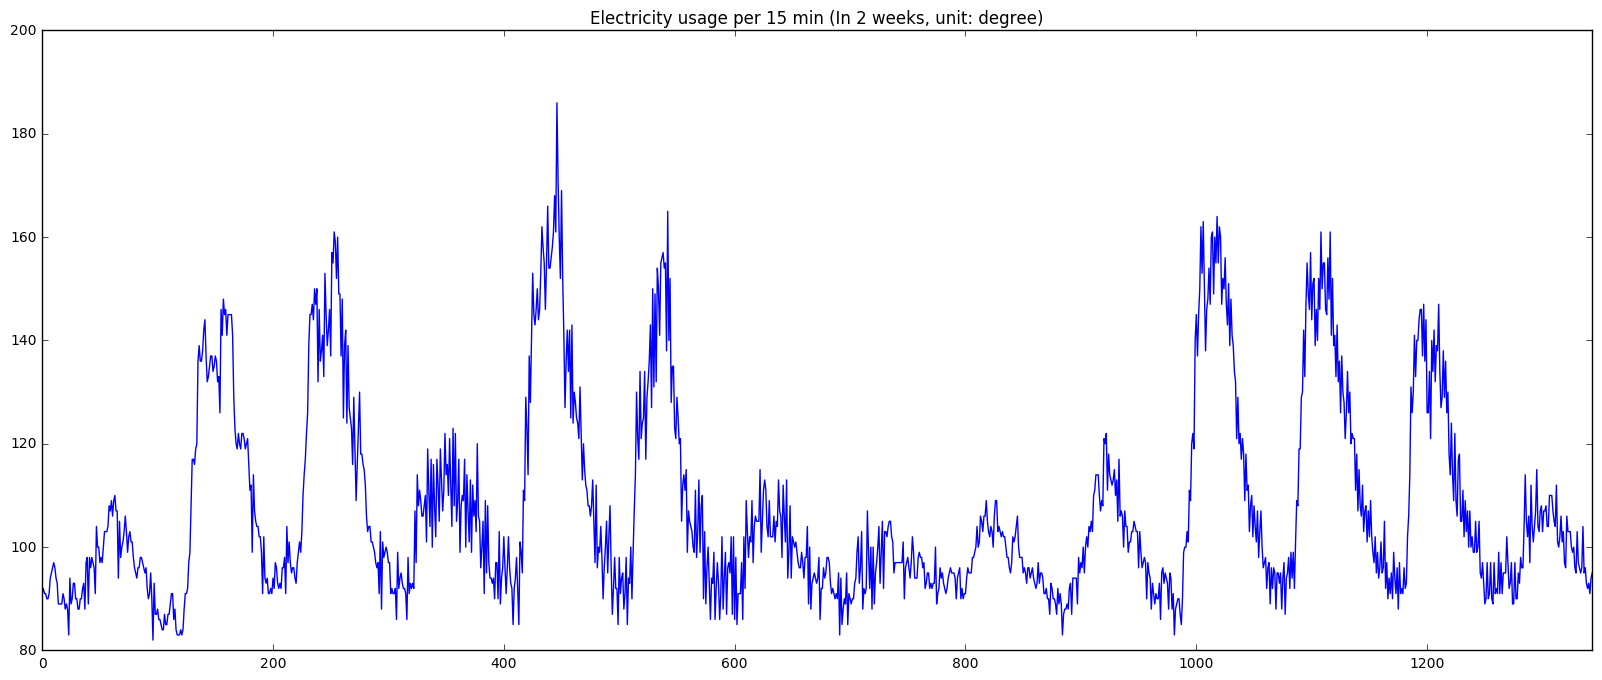

In [48]:
newdf['用電量(單位:度)'].plot.line()
matplotlib.pyplot.title('Electricity usage per 15 min (In 2 weeks, unit: degree)')

In [49]:
#把欄名改成英文
newdf = newdf.rename(index=str, columns={'﻿時  間':"Date_Time",'用電量(單位:度)':"Usage"}) 
newdf.columns

Index(['Date_Time', 'Usage'], dtype='object')

In [50]:
df_hr = newdf.Date_Time.str[-5:-3]
df_min = newdf.Date_Time.str[-2:]
# print (df_hr.head(),df_min.head())
newdf.loc[:,'hr'] = pd.Series(df_hr)
newdf.loc[:,'min'] = pd.Series(df_min)
newdf.Date_Time = newdf.Date_Time.str[:-6]
newdf.head()

,Date_Time,Usage,hr,min
0,2017/10/01,91.0,00,00
1,2017/10/01,92.0,00,15
2,2017/10/01,91.0,00,30
3,2017/10/01,91.0,00,45
4,2017/10/01,90.0,01,00


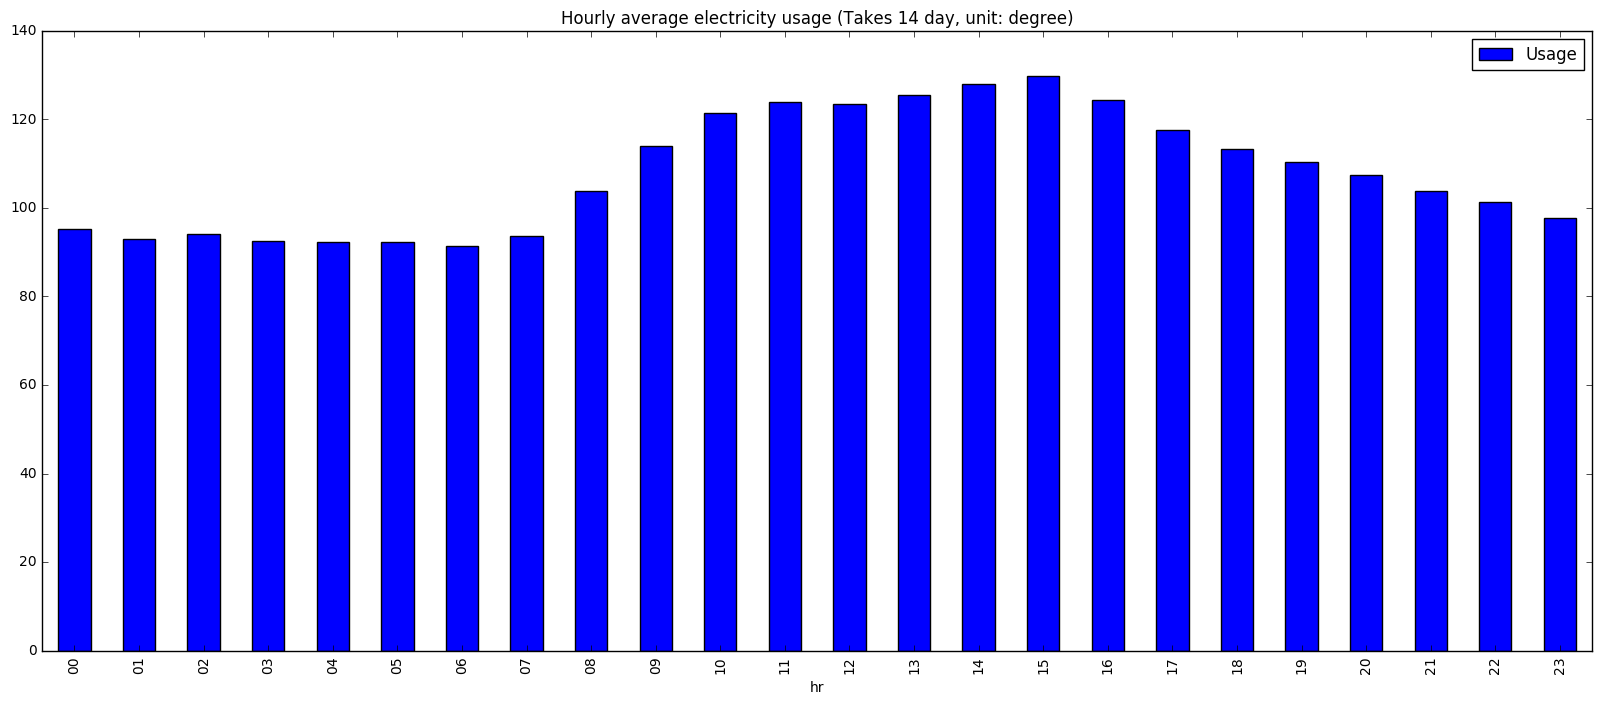

In [51]:
#科三每小時平均用電量, 範圍 10.01(Sun) - 10.14(Sat.)
dfnew_gpby = newdf.groupby(['hr'])
dfnew_gpby.mean().plot.bar()
matplotlib.pyplot.title('Hourly average electricity usage (Takes 14 day, unit: degree)')

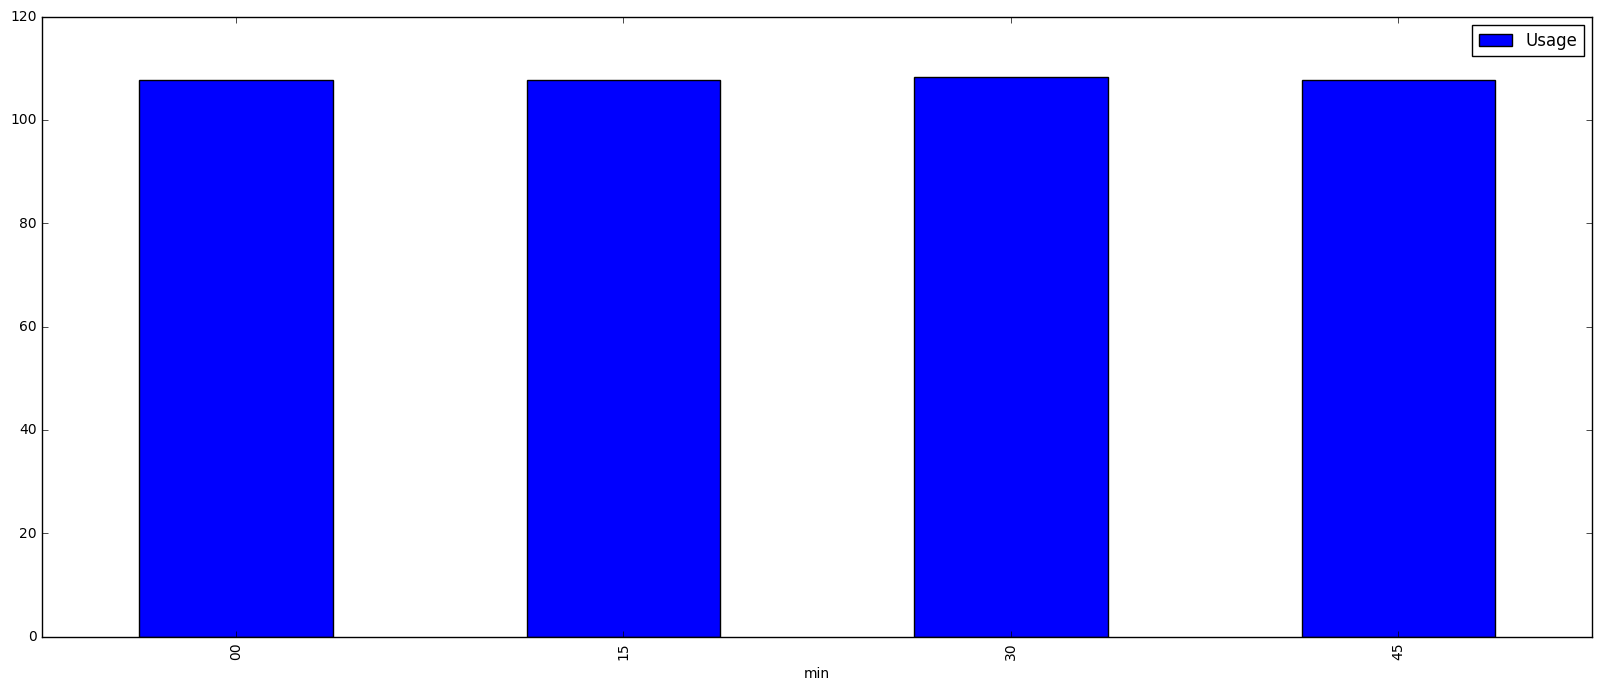

In [61]:
#科三每15分鐘用電量 
#沒什麼意義
dfnew_gpby = newdf.groupby(['min'])
dfnew_gpby.mean().plot.bar()
# matplotlib.pyplot.title('Minute average electricity usage (Takes 14 day, unit: degree)')

Date_Time
2017/10/01    Axes(0.125,0.125;0.775x0.775)
2017/10/02    Axes(0.125,0.125;0.775x0.775)
2017/10/03    Axes(0.125,0.125;0.775x0.775)
2017/10/04    Axes(0.125,0.125;0.775x0.775)
2017/10/05    Axes(0.125,0.125;0.775x0.775)
2017/10/06    Axes(0.125,0.125;0.775x0.775)
2017/10/07    Axes(0.125,0.125;0.775x0.775)
2017/10/08    Axes(0.125,0.125;0.775x0.775)
2017/10/09    Axes(0.125,0.125;0.775x0.775)
2017/10/10    Axes(0.125,0.125;0.775x0.775)
2017/10/11    Axes(0.125,0.125;0.775x0.775)
2017/10/12    Axes(0.125,0.125;0.775x0.775)
2017/10/13    Axes(0.125,0.125;0.775x0.775)
2017/10/14    Axes(0.125,0.125;0.775x0.775)
dtype: object

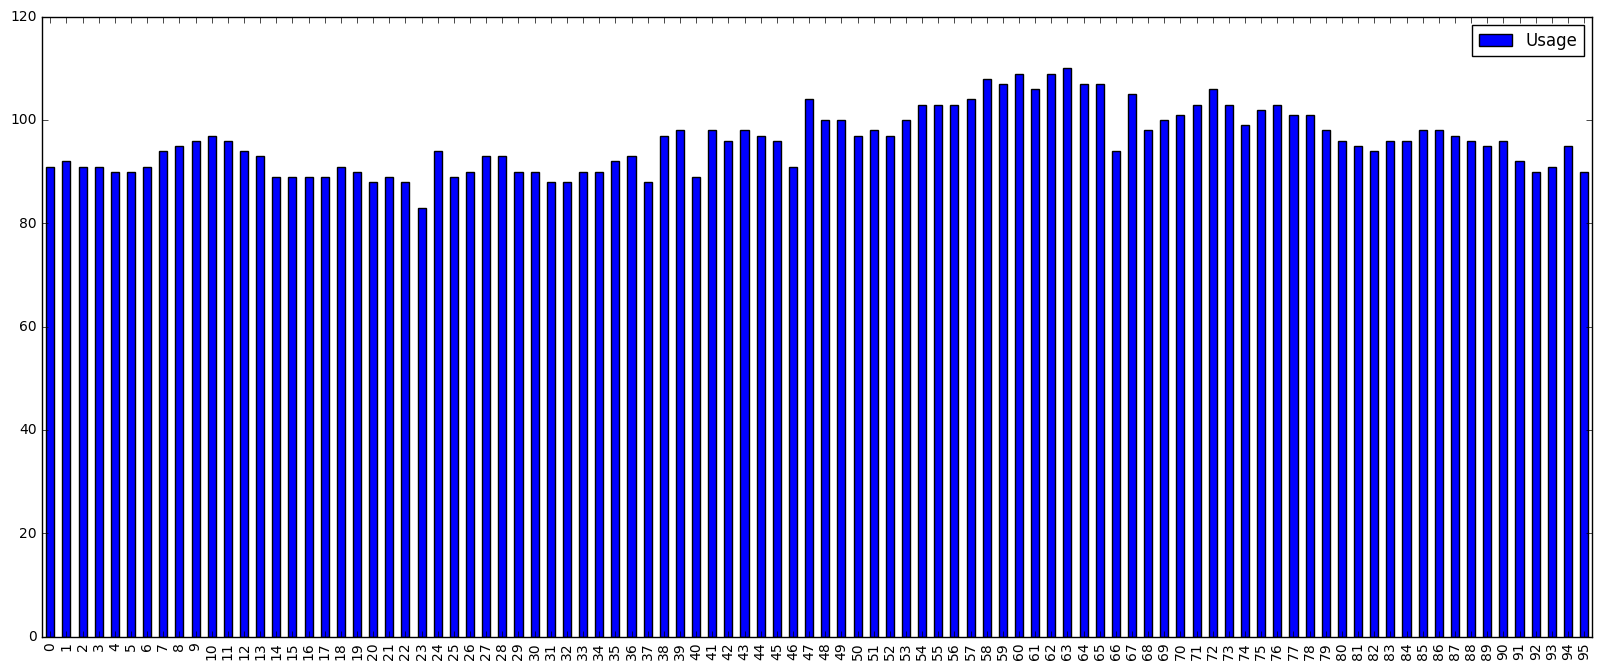

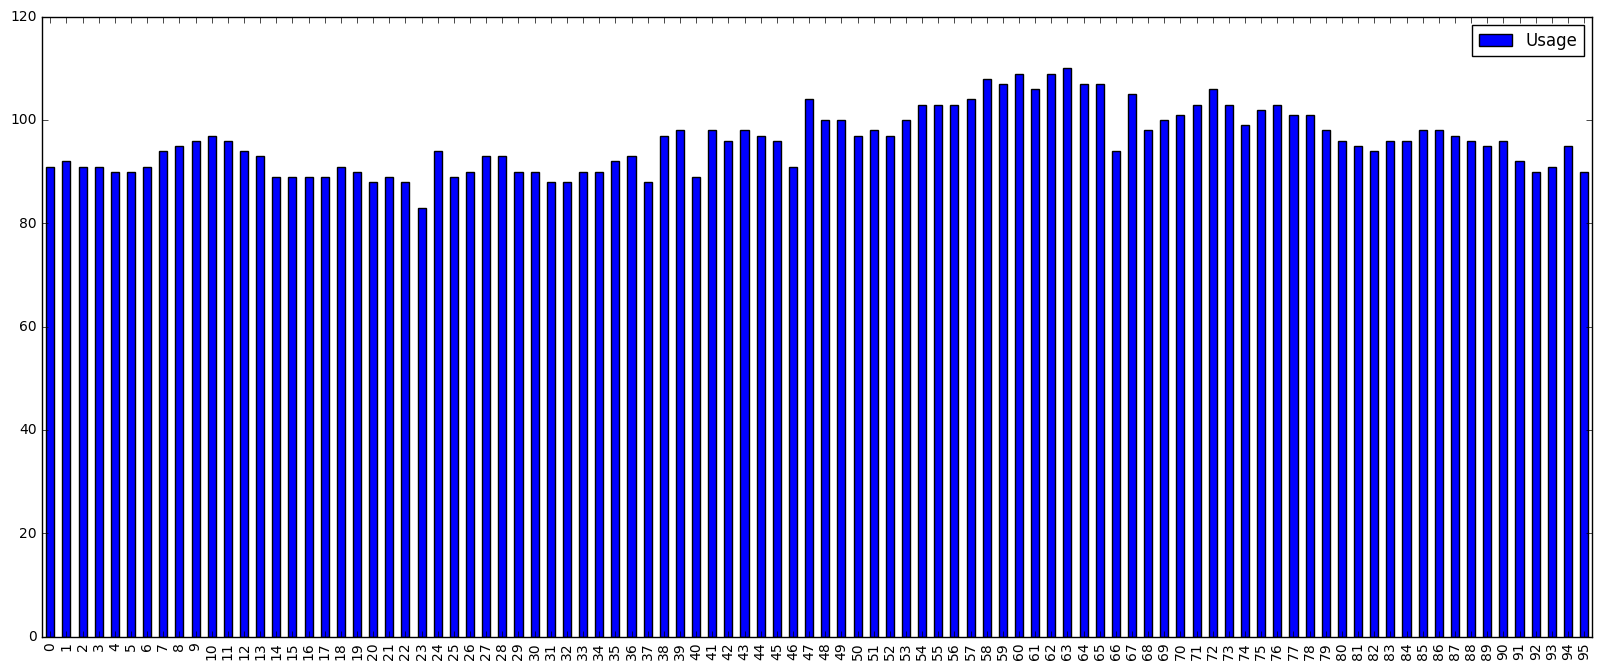

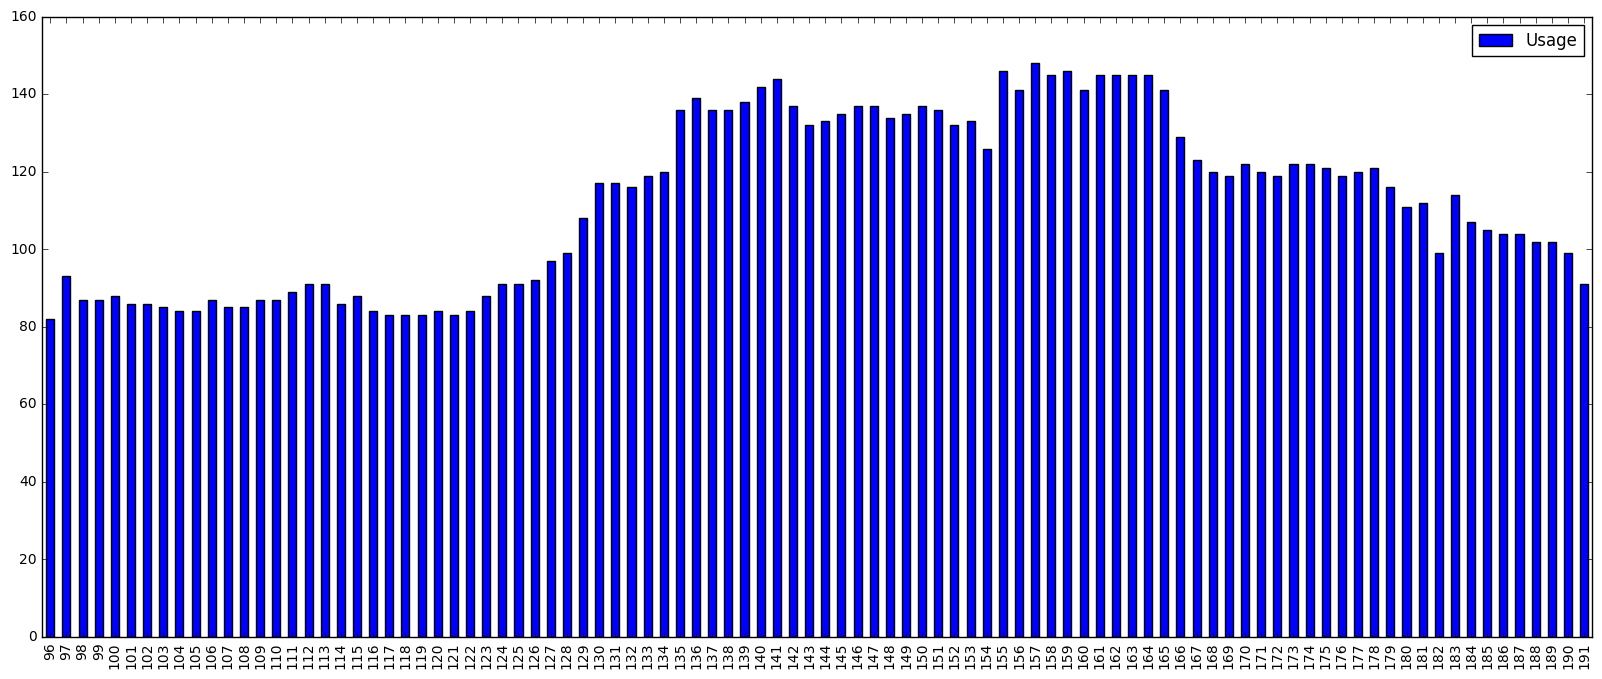

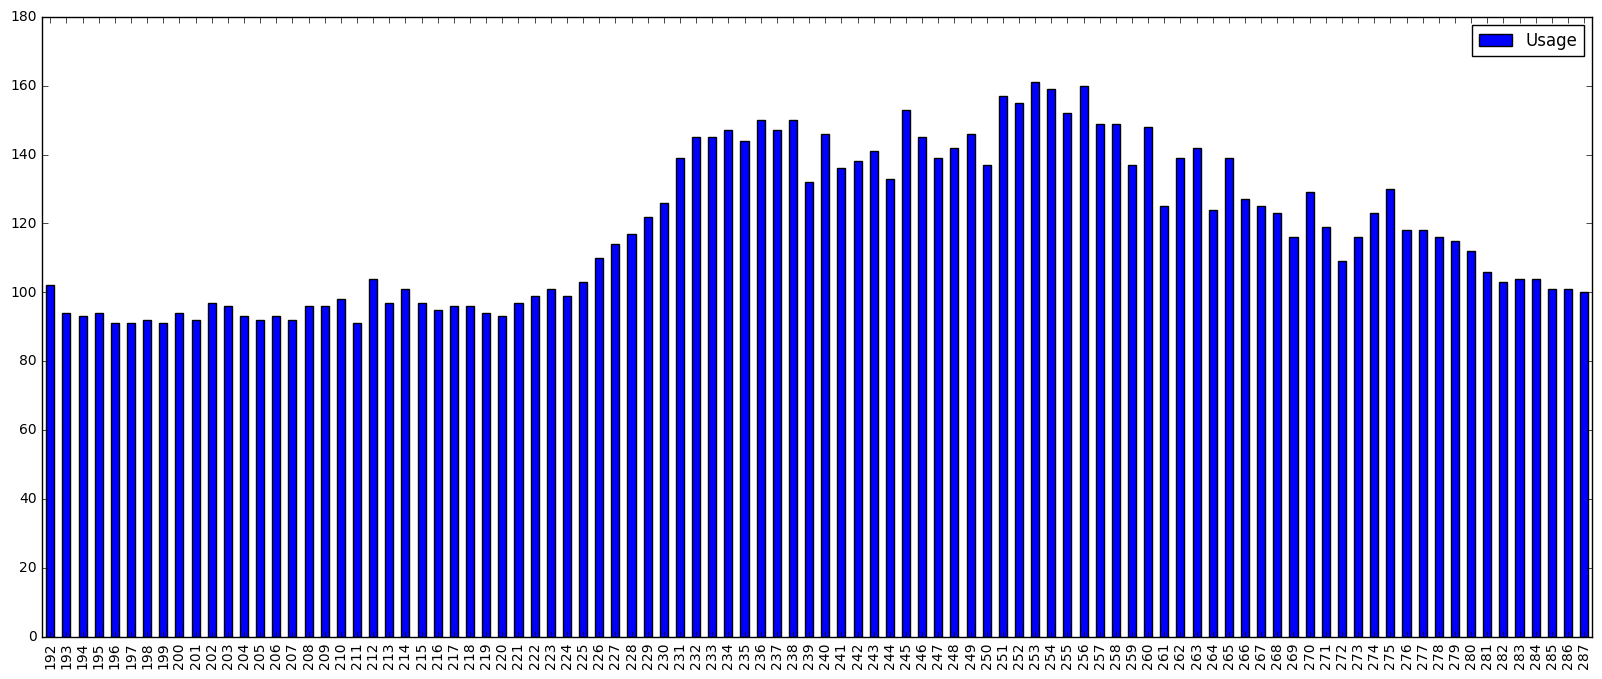

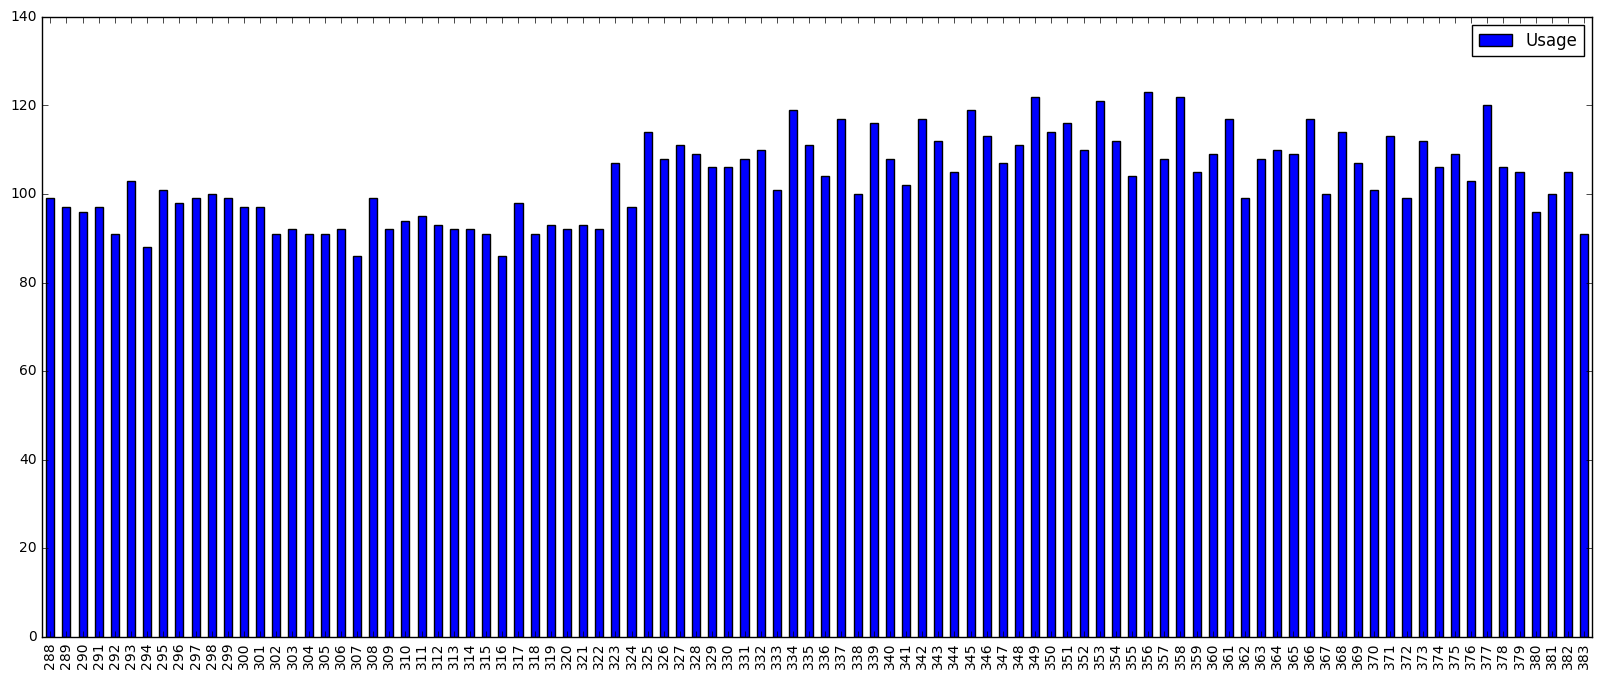

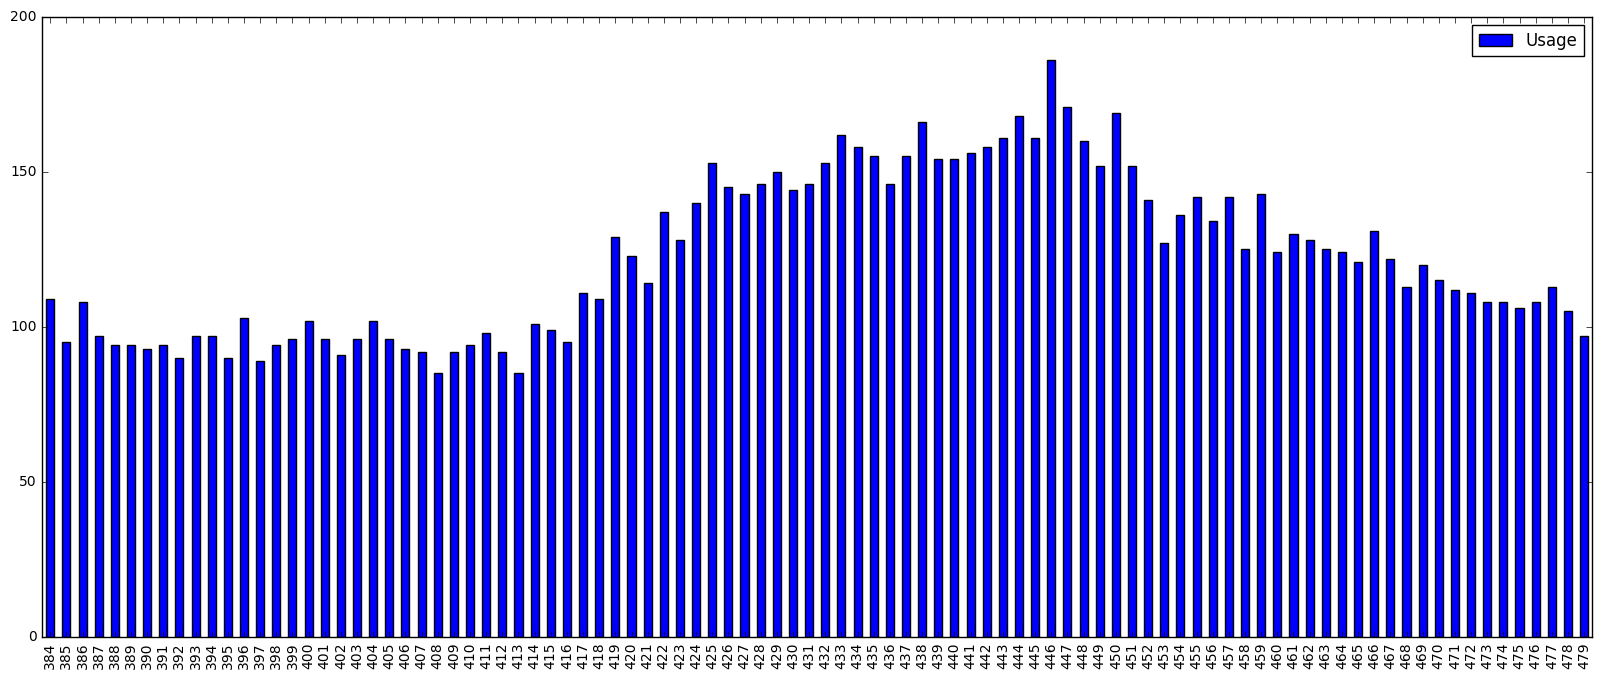

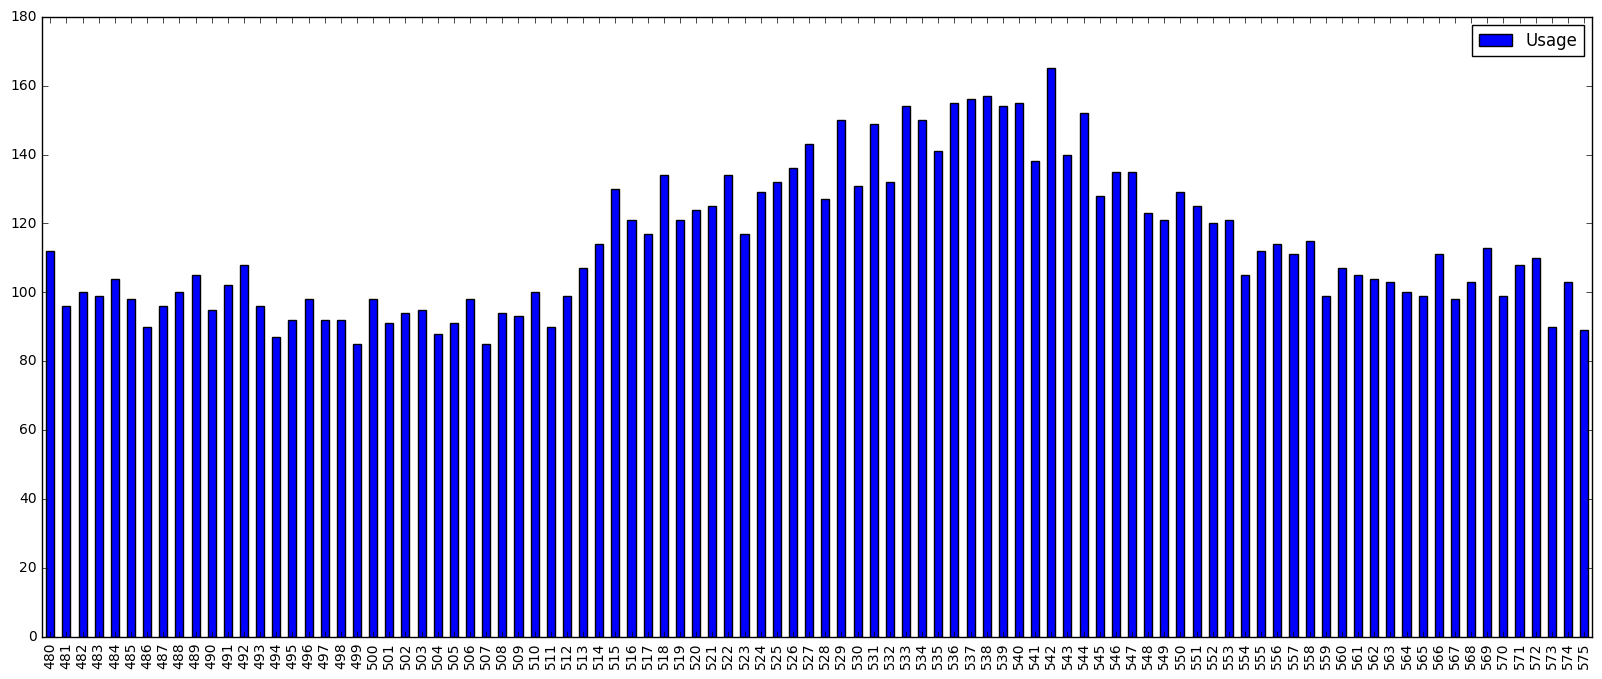

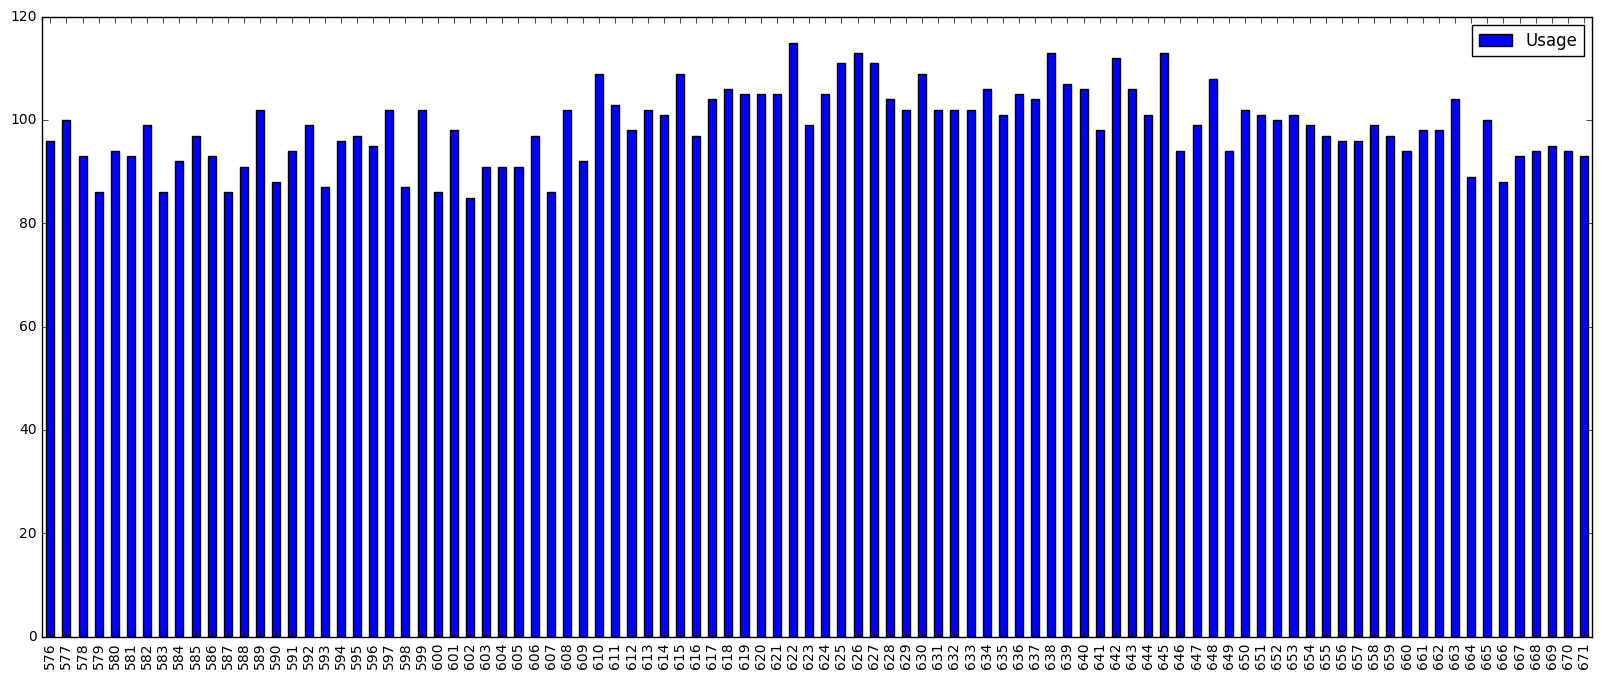

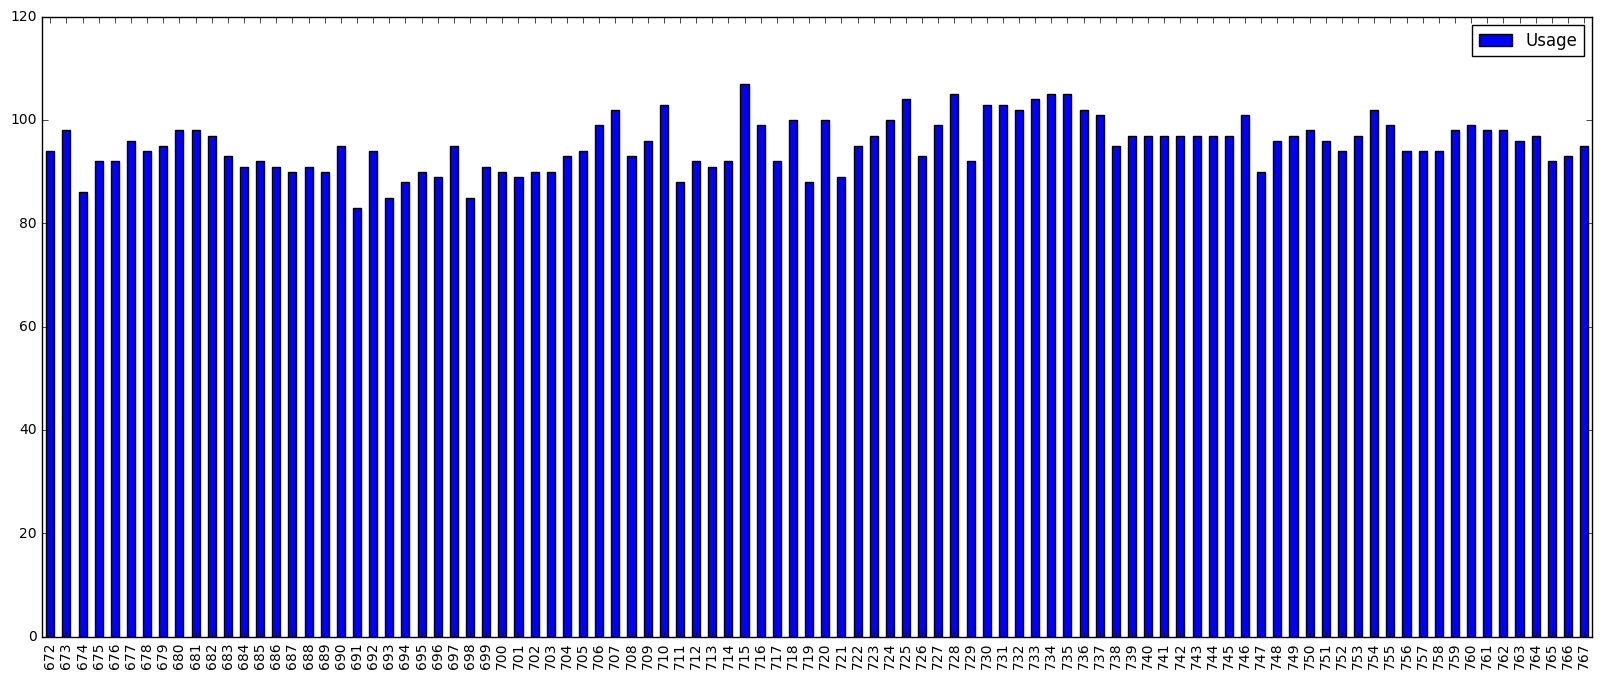

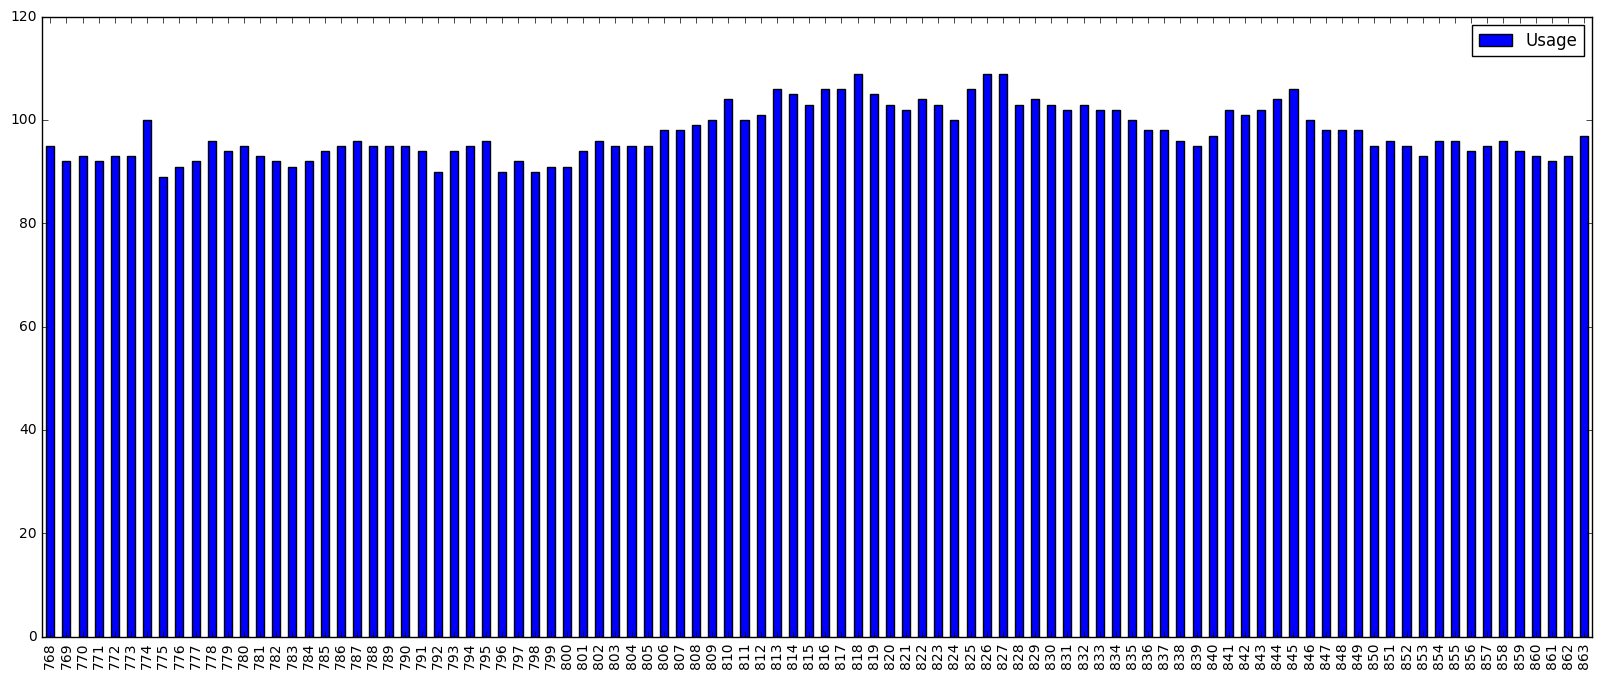

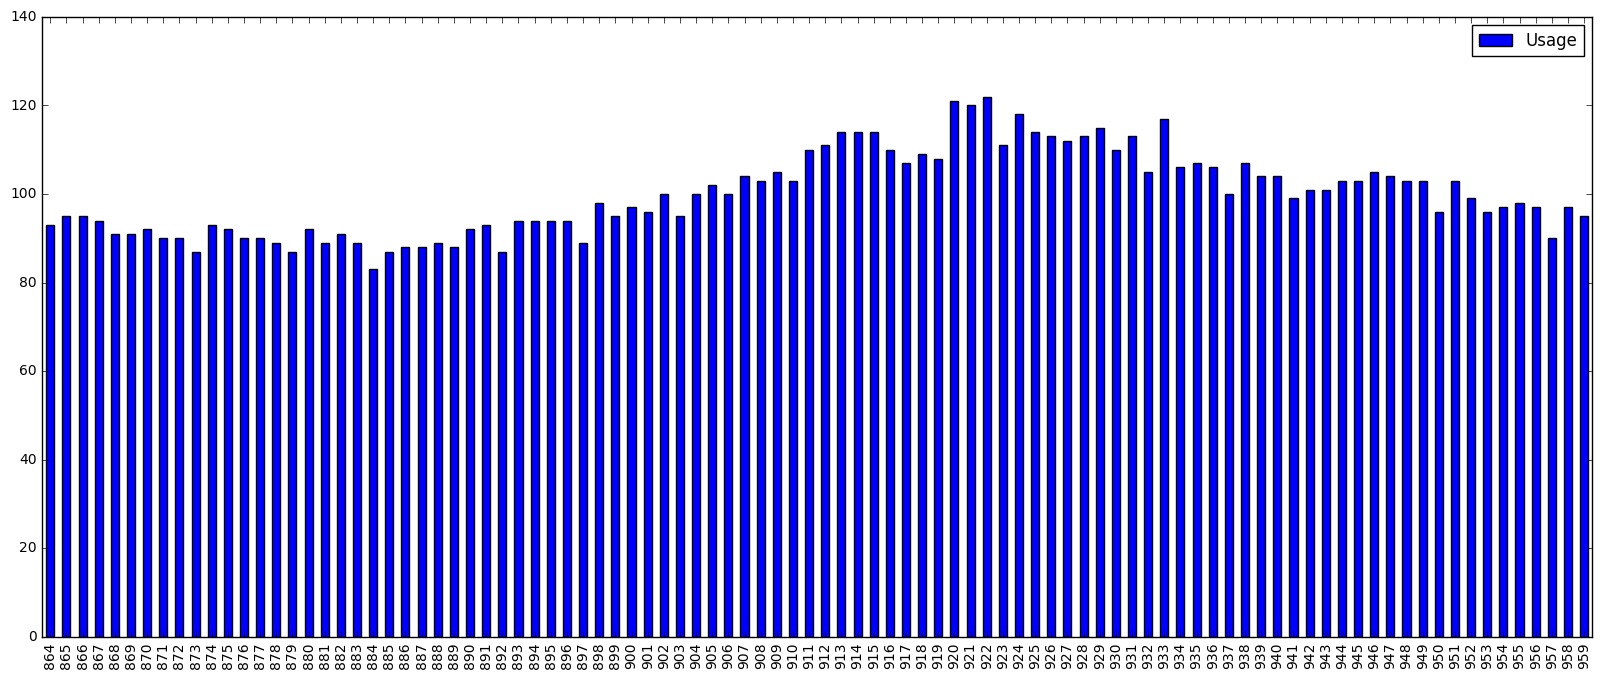

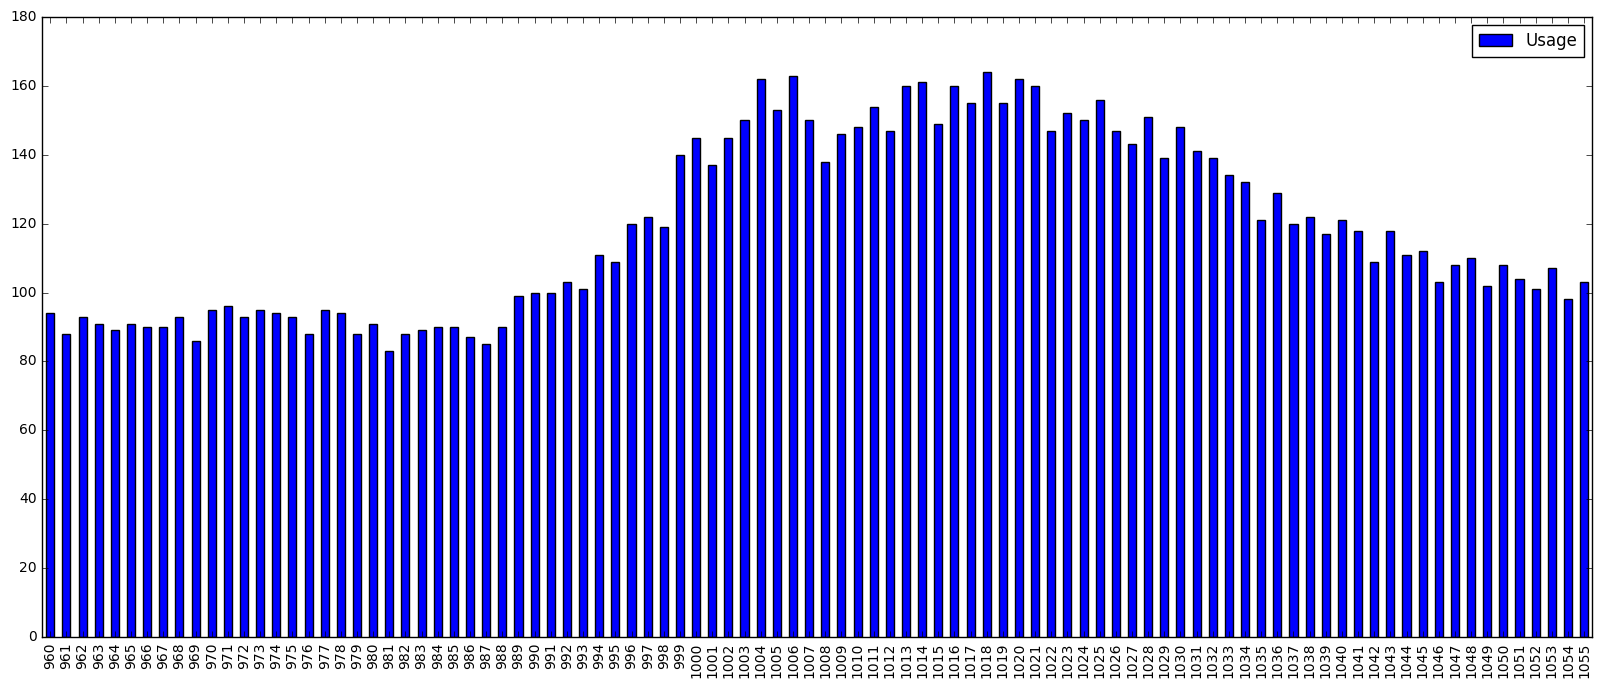

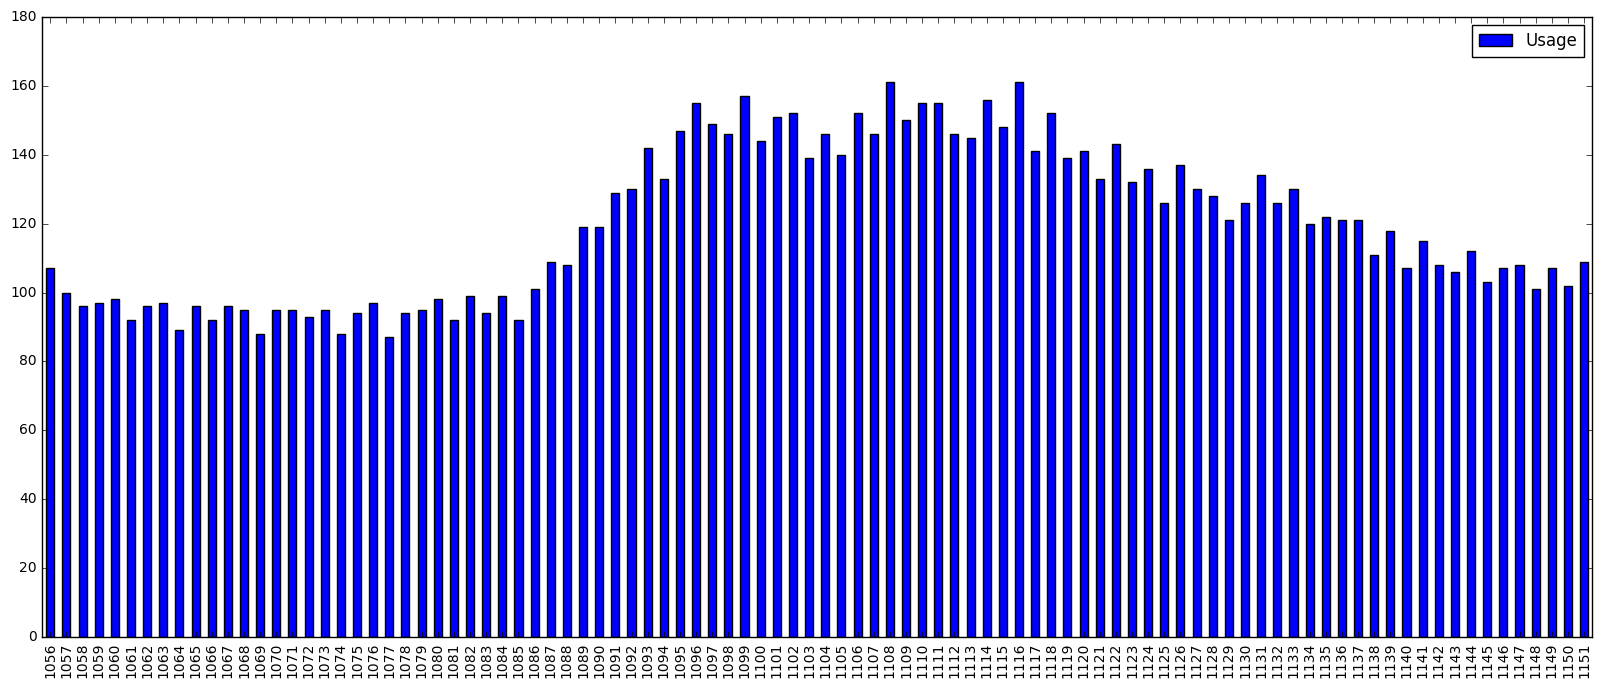

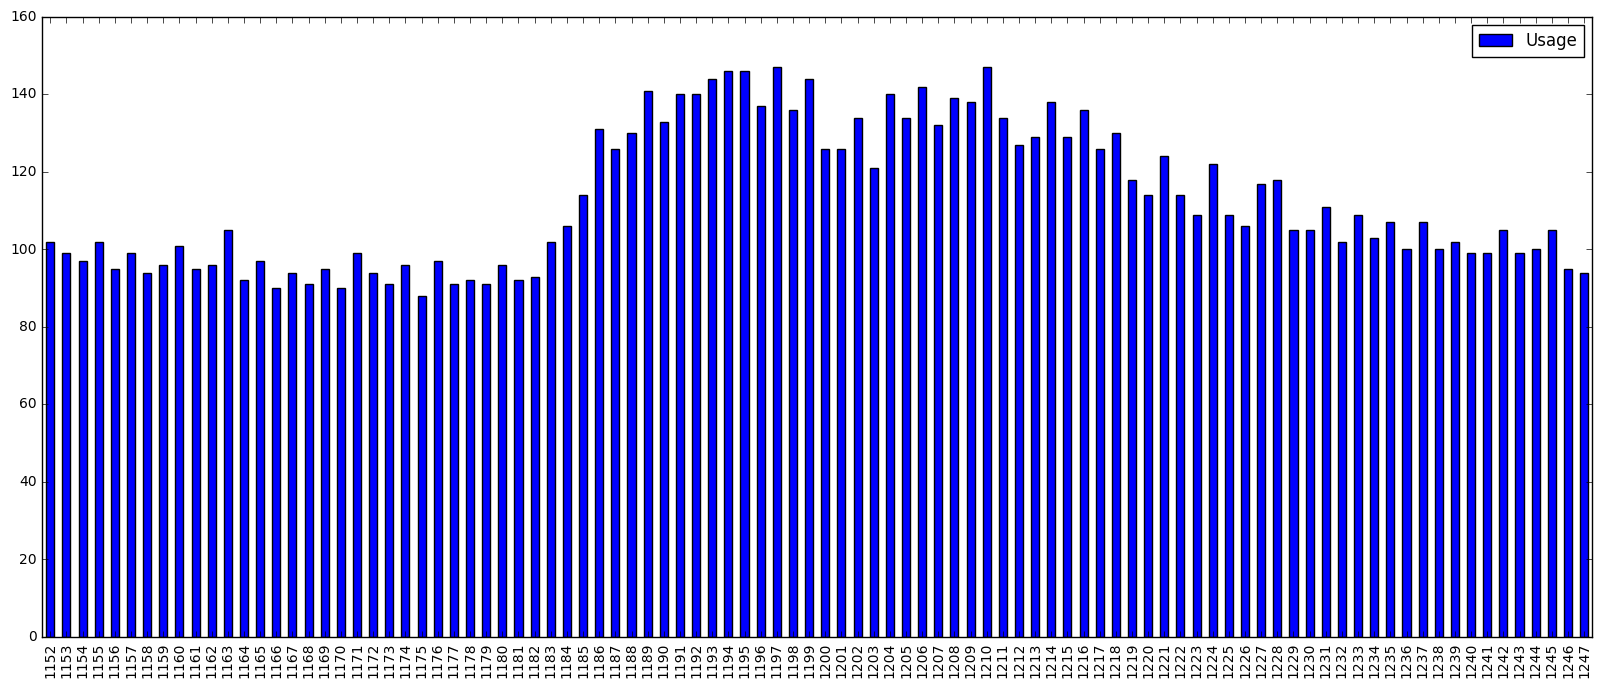

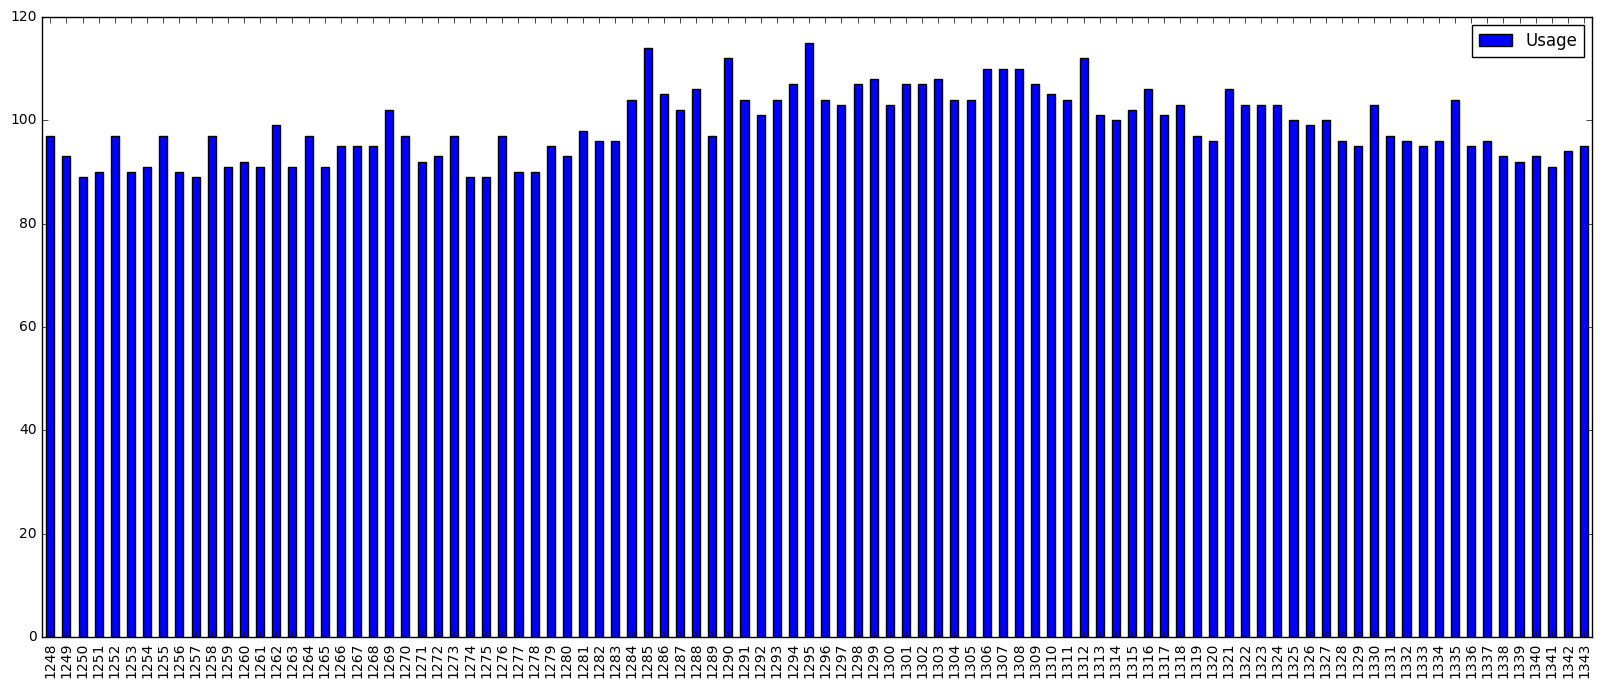

In [60]:
dfnew_byDay = newdf.groupby(['Date_Time'])
dfnew_byDay.plot.bar(stacked=True)

In [ ]:
df_te.plot.bar()
matplotlib.pyplot.title('Electricity usage in hours (Takes 14 day, unit: degree)')

In [63]:
plt.bar( 
        #using df['pre_score'] data,
        dfnew_byDay.Usage, 
        # of width
#         width, 
        # with alpha 0.5
#         alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
#         label=dfnew_byDay['Date_Time'][0]
) 

TypeError: bar() missing 1 required positional argument: 'height'

In [64]:
?plt.bar

In [ ]:
''